In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/train_lending_club.csv')
df_test=pd.read_csv('/content/test_lending_club.csv')

In [ ]:
print(len(df))
print(len(df_test))

236846
95019


In [ ]:
df.isnull().sum()

,0
issue_d,0
sub_grade,0
term,0
home_ownership,0
fico_range_low,0
total_acc,0
pub_rec,0
revol_util,0
annual_inc,0
int_rate,0


In [ ]:
from scipy import stats
numeric_cols = df.select_dtypes(include=np.number).columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df1= df[(z_scores < 3).all(axis=1)]

print("Rows before:", len(df))
print("Rows after removing outliers:", len(df1))

Rows before: 236846
Rows after removing outliers: 212713


In [ ]:
df1['loan_status'].value_counts(normalize=True) * 100


,proportion
loan_status,
1,83.342344
0,16.657656


In [ ]:
df1["fico_score"] = (df1["fico_range_low"] + df1["fico_range_high"]) / 2
df1 = df1.drop(["fico_range_low", "fico_range_high"], axis=1)
print(df1[["fico_score"]].head())


   fico_score
0       662.0
1       742.0
2       702.0
3       667.0
4       702.0


/tmp/ipython-input-3766383401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["fico_score"] = (df1["fico_range_low"] + df1["fico_range_high"]) / 2


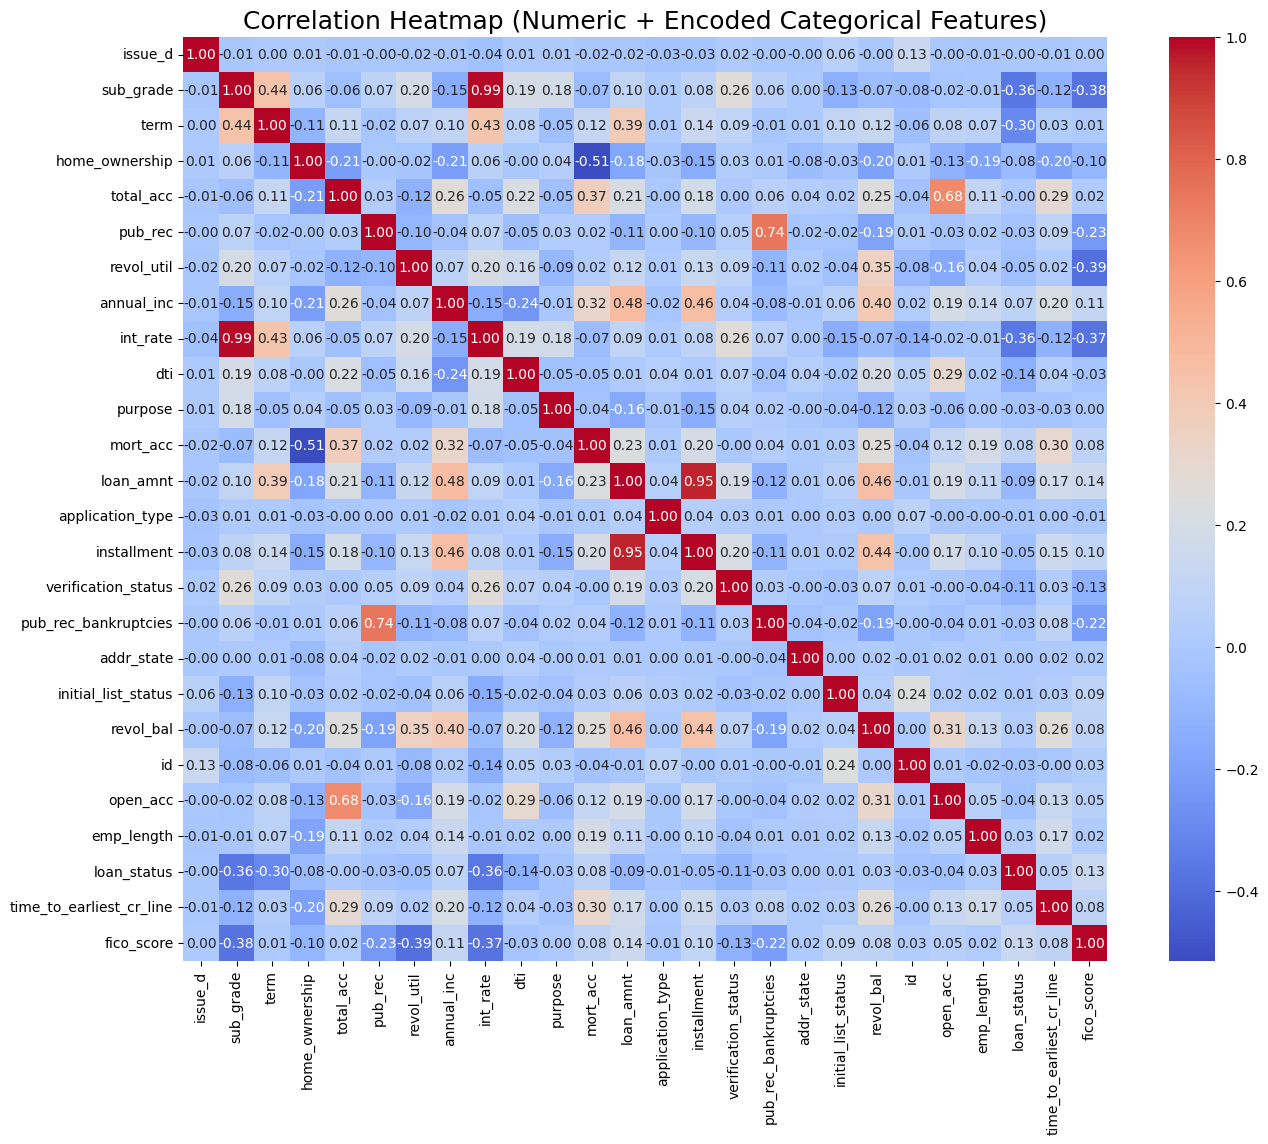

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df_encoded = df1.copy()

for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

corr_matrix = df_encoded.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True
)
plt.title("Correlation Heatmap (Numeric + Encoded Categorical Features)", fontsize=18)
plt.show()


In [ ]:
df1.columns.to_list()

['issue_d',
 'sub_grade',
 'term',
 'home_ownership',
 'total_acc',
 'pub_rec',
 'revol_util',
 'annual_inc',
 'int_rate',
 'dti',
 'purpose',
 'mort_acc',
 'loan_amnt',
 'application_type',
 'installment',
 'verification_status',
 'pub_rec_bankruptcies',
 'addr_state',
 'initial_list_status',
 'revol_bal',
 'id',
 'open_acc',
 'emp_length',
 'loan_status',
 'time_to_earliest_cr_line',
 'fico_score']

In [ ]:
import pandas as pd

# Your dataset (replace with actual DataFrame)
# df = pd.read_csv("your_data.csv")
df_test["fico_score"] = (df_test["fico_range_low"] + df_test["fico_range_high"]) / 2
df_test = df_test.drop(["fico_range_low", "fico_range_high"], axis=1)

# Columns to keep
keep_cols = [
    'sub_grade',
    'fico_score',
    'annual_inc',
    'mort_acc',
    'initial_list_status',
    'time_to_earliest_cr_line',
    'emp_length',
    'revol_bal',
    'term',
    'home_ownership',
    'revol_util',
    'dti',
    'int_rate',
    'loan_amnt',
    'verification_status'
]

# Create new dataframe with only selected columns + target
df_selected = df1[keep_cols + ['loan_status']]  # keep target too
df_test1 = df_test[keep_cols + ['loan_status']]
print("Original shape:", df1.shape)
print("New shape:", df_selected.shape)

print("Original shape:", df_test.shape)
print("New shape:", df_test1.shape)

# If you want to overwrite
# df = df_selected


Original shape: (212713, 26)
New shape: (212713, 16)
Original shape: (95019, 26)
New shape: (95019, 16)


In [ ]:
from sklearn.utils import resample
import pandas as pd

# Separate majority and minority classes
df_majority = df_selected [df_selected ["loan_status"] == 1]   # assuming 1 = Yes
df_minority = df_selected [df_selected ["loan_status"] == 0]   # assuming 0 = No

# Downsample majority class
df_majority_downsampled = resample(
    df_majority,
    replace=False,              # sample without replacement
    n_samples=len(df_minority), # match minority size
    random_state=42
)

# Combine minority with downsampled majority
df_balanced = pd.concat([df_majority_downsampled, df_minority])

print("Class distribution after under-sampling:")
print(df_balanced["loan_status"].value_counts())

Class distribution after under-sampling:
loan_status
1    35433
0    35433
Name: count, dtype: int64


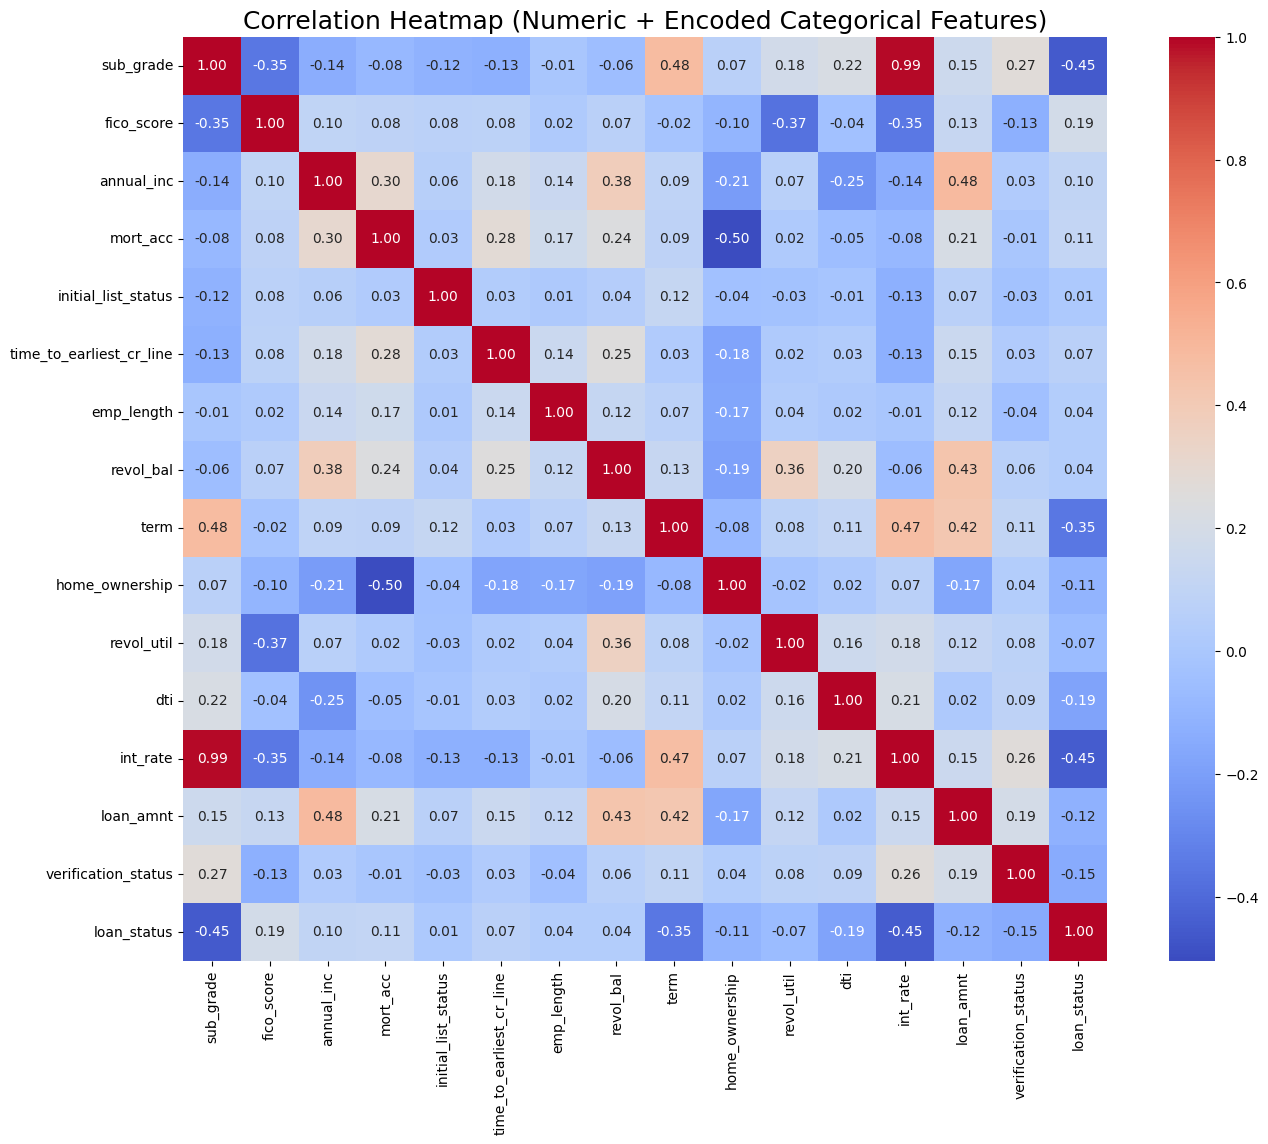

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df_encoded = df_balanced.copy()

for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

corr_matrix = df_encoded.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True
)
plt.title("Correlation Heatmap (Numeric + Encoded Categorical Features)", fontsize=18)
plt.show()


In [ ]:
df_balanced.columns.to_list()

['sub_grade',
 'fico_score',
 'annual_inc',
 'mort_acc',
 'initial_list_status',
 'time_to_earliest_cr_line',
 'emp_length',
 'revol_bal',
 'term',
 'home_ownership',
 'revol_util',
 'dti',
 'int_rate',
 'loan_amnt',
 'verification_status',
 'loan_status']

In [ ]:
print(len(df_balanced))

70866


In [ ]:
df_balanced.head()

,sub_grade,fico_score,annual_inc,mort_acc,initial_list_status,time_to_earliest_cr_line,emp_length,revol_bal,term,home_ownership,revol_util,dti,int_rate,loan_amnt,verification_status,loan_status
207575,B5,687.0,167000.0,2,w,623289.6,11,6241,36 months,OWN,75.2,9.51,11.47,12000,Source Verified,1
212404,D1,692.0,56000.0,5,f,378691.2,11,41477,36 months,MORTGAGE,81.3,21.37,16.29,25750,Source Verified,1
219122,C3,702.0,67000.0,0,f,381369.6,11,4871,36 months,RENT,33.6,19.04,13.67,1200,Verified,1
158676,C5,682.0,175000.0,0,w,486518.4,8,37334,36 months,RENT,95.0,8.73,14.33,24000,Verified,1
96772,C1,692.0,43000.0,1,w,428544.0,0,5215,36 months,OWN,56.7,4.94,12.29,6000,Not Verified,1


In [ ]:
import pandas as pd

# Sample: assuming your dataset is in df
# df = pd.read_csv("your_data.csv")

# Columns that are categorical
categorical_cols = [
    "sub_grade",
    "term",
    "home_ownership",
    "verification_status",
    "initial_list_status"
]

# Convert to category dtype
for col in categorical_cols:
    df_balanced[col] = df_balanced[col].astype("category")

for col in categorical_cols:
    df_test1[col] = df_test1[col].astype("category")

# Check dtypes
print(df_balanced.dtypes)

# Now df is ready for LightGBM


sub_grade                   category
fico_score                   float64
annual_inc                   float64
mort_acc                       int64
initial_list_status         category
time_to_earliest_cr_line     float64
emp_length                     int64
revol_bal                      int64
term                        category
home_ownership              category
revol_util                   float64
dti                          float64
int_rate                     float64
loan_amnt                      int64
verification_status         category
loan_status                    int64
dtype: object


/tmp/ipython-input-2872053537.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1[col] = df_test1[col].astype("category")
/tmp/ipython-input-2872053537.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1[col] = df_test1[col].astype("category")
/tmp/ipython-input-2872053537.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [ ]:
print(df_test1['loan_status'].isna().sum())
df_test1 = df_test1.dropna(subset=['loan_status'])
print(df_test1['loan_status'].isna().sum())



1412
0


In [ ]:
!apt-get install -y cmake
!pip install lightgbm --install-option=--gpu

!pip install lightgbm


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --install-option


In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, precision_recall_curve
import matplotlib.pyplot as plt


In [ ]:
target = "loan_status"

features = [
 'sub_grade',
 'fico_score',
 'annual_inc',
 'mort_acc',
 'initial_list_status',
 'time_to_earliest_cr_line',
 'emp_length',
 'revol_bal',
 'term',
 'home_ownership',
 'revol_util',
 'dti',
 'int_rate',
 'loan_amnt',
 'verification_status'
]

# Categorical columns
categorical_cols = [
    "sub_grade",
    "initial_list_status",
    "term",
    "home_ownership",
    "verification_status"
]


In [ ]:
# Drop rows with NaN target
df_balanced = df_balanced.dropna(subset=[target])
df_test = df_test.dropna(subset=[target])

# Select only the required features
X = df_balanced[features]
y = df_balanced[target]

X_test = df_test1[features]
y_test = df_test1[target]

# Convert categorical columns to 'category' dtype
for col in categorical_cols:
    X[col] = X[col].astype("category")
    X_test[col] = X_test[col].astype("category")


/tmp/ipython-input-2364929262.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype("category")
/tmp/ipython-input-2364929262.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].astype("category")


In [ ]:
# Create debt-to-income ratio
X['debt_to_income'] = X['loan_amnt'] / X['annual_inc']
X_test['debt_to_income'] = X_test['loan_amnt'] / X_test['annual_inc']

# Create available revolving credit ratio
X['available_revol_credit'] = X['revol_bal'] / (X['revol_util'] + 1e-6)
X_test['available_revol_credit'] = X_test['revol_bal'] / (X_test['revol_util'] + 1e-6)

# Drop original features used in ratios
X = X.drop(columns=['loan_amnt', 'annual_inc', 'revol_bal', 'revol_util'])
X_test = X_test.drop(columns=['loan_amnt', 'annual_inc', 'revol_bal', 'revol_util'])

# Update features list
features = list(X.columns)
categorical_cols = [col for col in categorical_cols if col in features]


In [ ]:
# Compute scale_pos_weight for imbalance
scale_pos_weight = len(y[y==0]) / len(y[y==1])

# Define small parameter grid for quick tuning
param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'scale_pos_weight': [1, scale_pos_weight]
}

# Initialize LightGBM classifier
lgbm_clf = LGBMClassifier(objective='binary', boosting_type='gbdt', random_state=42)

# StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Grid Search
grid = GridSearchCV(
    estimator=lgbm_clf,
    param_grid=param_grid,
    scoring='f1',
    cv=skf,
    n_jobs=-1,
    verbose=2
)

# Fit Grid Search (fast due to small grid and 3-fold CV)
grid.fit(X, y, categorical_feature=categorical_cols)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=LGBMClassifier(objective='binary', random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [-1, 10],
                         'n_estimators': [100, 200], 'num_leaves': [31, 50],
                         'scale_pos_weight': [1, 1.0]},
             scoring='f1', verbose=2)

In [ ]:
print("Best F1 Score from Grid Search:", grid.best_score_)
print("Best Parameters:", grid.best_params_)


Best F1 Score from Grid Search: 0.7305542034324691
Best Parameters: {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 31, 'scale_pos_weight': 1}


In [ ]:
best_params = grid.best_params_

final_model = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    random_state=42,
    **best_params
)

final_model.fit(X, y, categorical_feature=categorical_cols)


LGBMClassifier(learning_rate=0.05, n_estimators=200, objective='binary',
               random_state=42, scale_pos_weight=1)

In [ ]:
test_preds = final_model.predict_proba(X_test)[:, 1]

# Optimize threshold based on F1 score
precision, recall, thresholds = precision_recall_curve(y_test, test_preds)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_thresh = thresholds[np.argmax(f1_scores)]
print("Optimal Threshold for max F1:", best_thresh)

# Apply threshold
test_preds_binary = (test_preds >= best_thresh).astype(int)

# Metrics
print("\n===== Test Results =====")
print("Test Accuracy:", accuracy_score(y_test, test_preds_binary))
print("Test AUC:", roc_auc_score(y_test, test_preds))
print("\nClassification Report:\n", classification_report(y_test, test_preds_binary))


Optimal Threshold for max F1: 0.16348804101683737

===== Test Results =====
Test Accuracy: 0.8681188372664438
Test AUC: 0.8354937993049932

Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.28      0.40     14748
         1.0       0.88      0.98      0.93     78859

    accuracy                           0.87     93607
   macro avg       0.79      0.63      0.67     93607
weighted avg       0.85      0.87      0.84     93607



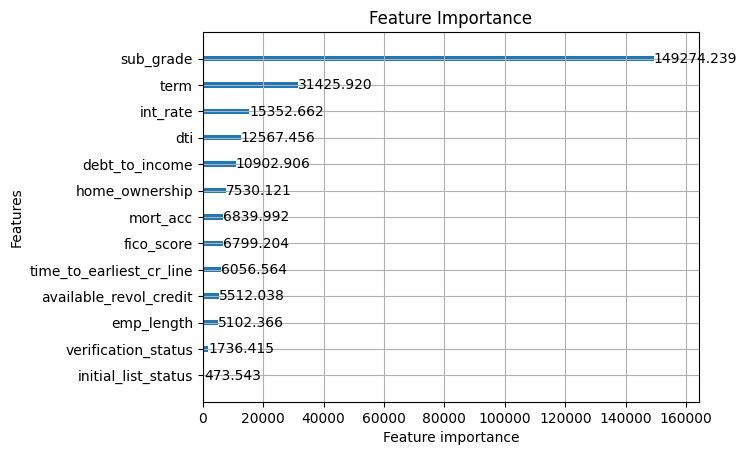

In [ ]:
lgb.plot_importance(final_model, max_num_features=15, importance_type="gain")
plt.title("Feature Importance")
plt.show()
